In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


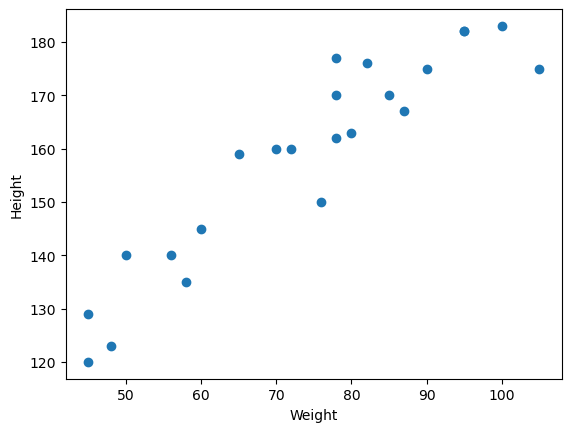

In [12]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [13]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [38]:
import seaborn as sns
sns.pairplot(df)

In [56]:
X=df['Weight']
X
X = df['Weight'].values.reshape(-1, 1)

In [57]:
np.array(X).shape

(23, 1)

In [58]:
Y=df['Height']
Y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [59]:
Y.shape

(23,)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [61]:
X_train.shape
y_train.shape

(17,)

In [62]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [66]:
X_test = scaler.transform(X_test)
X_test

array([[-4.3699745 ],
       [-4.3699745 ],
       [-4.49108234],
       [-4.30758562],
       [-4.41768365],
       [-4.27088627]])

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
regression = LinearRegression()

In [70]:
regression.fit(X_train,y_train)

LinearRegression()

In [71]:
regression

LinearRegression()

In [72]:
regression.coef_

array([1.04792503])

In [73]:
regression.intercept_

np.float64(80.52684512622542)

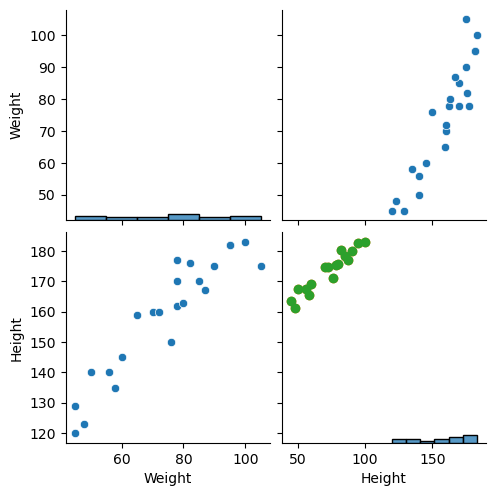

In [75]:
plt.scatter(X_train,y_train)
plt.show()

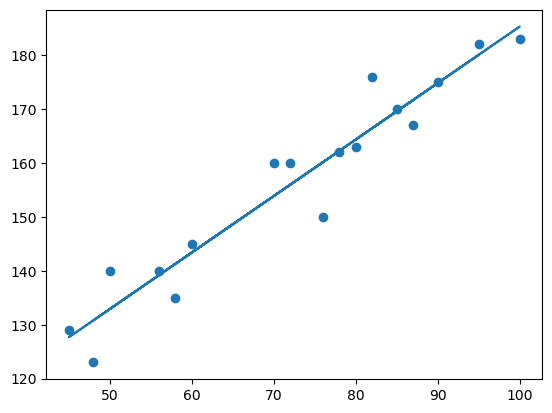

In [77]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [80]:
y_pred = regression.predict(X_test)

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8156.582884174983
87.88717579524308
90.3138022905413


In [90]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

In [93]:

adjusted_r2 = adjusted_r2_score(y_test, y_pred, X.shape[1])
print(f"Adjusted R²: {adjusted_r2}")

Adjusted R²: -22.430975409375947


In [94]:
##OLS
import statsmodels.api as sm

In [95]:
model = sm.OLS(y_train,X_train).fit()

In [96]:
pred = model.predict(X_test)
print(pred)

[-9.1956704  -9.1956704  -9.45051577 -9.06438642 -9.29606403 -8.98716056]


In [97]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):                    2.80e-16
Time:                        17:47:06   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Ak\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [100]:
regression.predict(scaler.transform([[72]]))

array([80.49697064])